In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import japanize_matplotlib

#出力する行数を設定、省略をなくす
pd.set_option('display.max_rows', 500)

from sklearn.metrics import mean_absolute_error


In [3]:
train=pd.read_csv('train_aranged.csv')
train.head()

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,40020197,40133,福岡県,谷,桜坂,7,２ＬＤＫ,3.806662,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2021.50,改装済,7.041393
1,40031380,40137,福岡県,西新,西新,4,１Ｋ,2.708050,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.50,未改装,6.602060
2,40030436,40137,福岡県,小田部,室見,18,４ＬＤＫ,4.382027,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2020.99,改装済,7.397940
3,40015295,40132,福岡県,竹丘町,雑餉隈,5,２ＬＤＫ,4.094345,16.0,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.25,未改装,7.278754
4,40147771,40133,福岡県,荒戸,大濠公園,6,３ＤＫ,4.094345,35.0,ＳＲＣ,住宅,NaN,商業地域,80.0,400.0,2007.50,未改装,6.929419


In [4]:
#カテゴリ変数化------------------------------------<
#市区町村コードはカテゴリ変数

use_columns=["市区町村コード", "都道府県名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装"]
for col in use_columns:
    train[col] = train[col].astype("category")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722564 entries, 0 to 722563
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   ID            722564 non-null  int64   
 1   市区町村コード       722564 non-null  category
 2   都道府県名         722564 non-null  category
 3   地区名           721896 non-null  category
 4   最寄駅：名称        719833 non-null  category
 5   最寄駅：距離（分）     722564 non-null  int64   
 6   間取り           696674 non-null  category
 7   面積（㎡）         722564 non-null  float64 
 8   建築年           722564 non-null  float64 
 9   建物の構造         703412 non-null  category
 10  用途            651706 non-null  category
 11  今後の利用目的       356647 non-null  category
 12  都市計画          702746 non-null  category
 13  建ぺい率（％）       698403 non-null  float64 
 14  容積率（％）        698403 non-null  float64 
 15  取引時点          722564 non-null  float64 
 16  改装            654490 non-null  category
 17  取引価格（総額）_log  722564 non-null

In [5]:
test=pd.read_csv('test_adjusted.csv')
test.head()

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,1000078,1101,北海道,大通西,西１１丁目,1,３ＬＤＫ,4.317488,6.0,ＲＣ,住宅,住宅,商業地域,80.0,600.0,2021.50,未改装
1,1000121,1101,北海道,大通西,西１８丁目,0,１ＤＫ,3.401197,45.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
2,1000123,1101,北海道,大通西,西１８丁目,3,３ＬＤＫ,4.248495,38.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
3,1000127,1101,北海道,大通西,西１８丁目,2,２ＬＤＫ,3.912023,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,未改装
4,1000129,1101,北海道,大通西,西１８丁目,2,１ＤＫ,3.806662,31.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,改装済


In [6]:
#カテゴリ変数化------------------------------------<
use_columns=["市区町村コード", "都道府県名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装"]
for col in use_columns:
    test[col] = test[col].astype("category")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21005 entries, 0 to 21004
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         21005 non-null  int64   
 1   市区町村コード    21005 non-null  category
 2   都道府県名      21005 non-null  category
 3   地区名        21004 non-null  category
 4   最寄駅：名称     21000 non-null  category
 5   最寄駅：距離（分）  21005 non-null  int64   
 6   間取り        19847 non-null  category
 7   面積（㎡）      21005 non-null  float64 
 8   建築年        21005 non-null  float64 
 9   建物の構造      19776 non-null  category
 10  用途         15396 non-null  category
 11  今後の利用目的    20081 non-null  category
 12  都市計画       20701 non-null  category
 13  建ぺい率（％）    20596 non-null  float64 
 14  容積率（％）     20596 non-null  float64 
 15  取引時点       21005 non-null  float64 
 16  改装         18032 non-null  category
dtypes: category(10), float64(5), int64(2)
memory usage: 1.7 MB


In [7]:
'''
１平米あたりの価格の対数をカラムとして加える
これが目的変数
'''
#面積の対数をとってカラムとする
train_area_log=train

#1平米あたりの価格の対数をとったものが、一時的なtmp目的変数
train_area_log['価格/面積_log']=train_area_log['取引価格（総額）_log']-train_area_log['面積（㎡）']
train_area_log=train_area_log.drop('ID', axis=1)

train_area_log.head(3)

,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log,価格/面積_log
0,40133,福岡県,谷,桜坂,7,２ＬＤＫ,3.806662,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2021.50,改装済,7.041393,3.234730
1,40137,福岡県,西新,西新,4,１Ｋ,2.708050,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2020.50,未改装,6.602060,3.894010
2,40137,福岡県,小田部,室見,18,４ＬＤＫ,4.382027,34.0,ＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,150.0,2020.99,改装済,7.397940,3.015913


In [8]:

"""
学習,検証9:テスト1
"""

from sklearn.model_selection import train_test_split

#説明変数 ： X
X=train_area_log.drop(['取引価格（総額）_log','価格/面積_log'], axis=1)

#目的変数 : y
y=train_area_log[['取引価格（総額）_log','価格/面積_log']]

#学習検証データとテストデータに分割, 9:1
train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, test_size=0.1, random_state=1)

#学習データと検証データに分割, 8:2
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.2, random_state=1)

#面積あたりの価格予測したい
train_y_tmp=train_y['価格/面積_log']
val_y_tmp=val_y['価格/面積_log']
test_y_tmp=test_y['価格/面積_log']

#本来予測したい
train_y=train_y['取引価格（総額）_log']
val_y=val_y['取引価格（総額）_log']
test_y=test_y['取引価格（総額）_log']
y1=y['取引価格（総額）_log']


In [9]:
import optuna.integration.lightgbm as lgb_tune
import lightgbm as lgb
import time

# trains=lgb_tune.Dataset(train_X, label=train_y_tmp)
# valids=lgb_tune.Dataset(val_X, label=val_y_tmp)
trains=lgb.Dataset(train_X, label=train_y_tmp)
valids=lgb.Dataset(val_X, label=val_y_tmp)

# params = {
#     "objective": "regression_l1",
#     "metric": "mae",
#     'n_estimators': 10000, 
#     'verbosity':-1,
#     'n_jobs':-1
# }

# s=time.time()
# model2 = lgb_tune.train(params, dtrain, 
#                     valid_sets=[dtrain, dval],
#                     verbose_eval=False,
#                     early_stopping_rounds=100,
#                     )
# e=time.time()
# print(e-s)

In [10]:
params={
 'objective': 'regression_l1',
 'metric': 'l1',
 'verbosity': -1,
 'n_jobs': -1,
 'feature_pre_filter': False,
 'lambda_l1': 2.58,
 'lambda_l2': 0.0004,
 'num_leaves': 5000,
 'feature_fraction': 0.4,
 'bagging_fraction': 0.7872093542436666,
 'bagging_freq': 7,
 'min_child_samples': 20,
 'num_iterations': 3000,
 'early_stopping_round': 100,
 #'categorical_column': [2, 3, 4, 6, 9, 10, 11, 12, 16],
 'learning_rate': 0.03,
 'random_state': 42
}
lgb_reg1 = lgb.train(params, trains, valid_sets=[trains,valids], num_boost_round=10000, early_stopping_rounds=100, verbose_eval=10)
#model2.fit(train_X, train_y)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-

Training until validation scores don't improve for 100 rounds
[10]	training's l1: 0.311398	valid_1's l1: 0.312123
[20]	training's l1: 0.253931	valid_1's l1: 0.255522
[30]	training's l1: 0.214527	valid_1's l1: 0.216792
[40]	training's l1: 0.180411	valid_1's l1: 0.183454
[50]	training's l1: 0.157039	valid_1's l1: 0.160618
[60]	training's l1: 0.139474	valid_1's l1: 0.14354
[70]	training's l1: 0.126743	valid_1's l1: 0.131336
[80]	training's l1: 0.117469	valid_1's l1: 0.122504
[90]	training's l1: 0.110551	valid_1's l1: 0.11597
[100]	training's l1: 0.103586	valid_1's l1: 0.109504
[110]	training's l1: 0.0974871	valid_1's l1: 0.103927
[120]	training's l1: 0.0932517	valid_1's l1: 0.100219
[130]	training's l1: 0.0895193	valid_1's l1: 0.0969865
[140]	training's l1: 0.086837	valid_1's l1: 0.0948601
[150]	training's l1: 0.084337	valid_1's l1: 0.0927833
[160]	training's l1: 0.0818787	valid_1's l1: 0.0907117
[170]	training's l1: 0.0799843	valid_1's l1: 0.0892267
[180]	training's l1: 0.0781775	valid_1

[1500]	training's l1: 0.0479792	valid_1's l1: 0.0731789
[1510]	training's l1: 0.0479147	valid_1's l1: 0.0731692
[1520]	training's l1: 0.0478593	valid_1's l1: 0.0731535
[1530]	training's l1: 0.0477944	valid_1's l1: 0.0731412
[1540]	training's l1: 0.0477458	valid_1's l1: 0.0731331
[1550]	training's l1: 0.0477038	valid_1's l1: 0.0731259
[1560]	training's l1: 0.0476713	valid_1's l1: 0.0731206
[1570]	training's l1: 0.0476289	valid_1's l1: 0.0731114
[1580]	training's l1: 0.0475852	valid_1's l1: 0.0731071
[1590]	training's l1: 0.0475249	valid_1's l1: 0.0730965
[1600]	training's l1: 0.047476	valid_1's l1: 0.0730901
[1610]	training's l1: 0.0474361	valid_1's l1: 0.0730817
[1620]	training's l1: 0.0473855	valid_1's l1: 0.0730746
[1630]	training's l1: 0.0473382	valid_1's l1: 0.0730667
[1640]	training's l1: 0.0472907	valid_1's l1: 0.0730595
[1650]	training's l1: 0.0472341	valid_1's l1: 0.0730535
[1660]	training's l1: 0.0471967	valid_1's l1: 0.073048
[1670]	training's l1: 0.0471529	valid_1's l1: 0.07

[2970]	training's l1: 0.0431591	valid_1's l1: 0.0724806
[2980]	training's l1: 0.0431396	valid_1's l1: 0.072477
[2990]	training's l1: 0.0431215	valid_1's l1: 0.0724748
[3000]	training's l1: 0.0430975	valid_1's l1: 0.0724698
Did not meet early stopping. Best iteration is:
[3000]	training's l1: 0.0430975	valid_1's l1: 0.0724698


In [ ]:
# from lightgbm import LGBMRegressor 

# params={
#  'boosting_type': 'gbdt',
#  'objective': 'regression_l1',
#  'metric': 'l1',
#  'verbosity': -1,
#  'n_jobs': -1,
#  'feature_pre_filter': False,
#  'lambda_l1': 2.58,
#  'lambda_l2': 0.0004,
#  'num_leaves': 5000,
#  'feature_fraction': 0.4,
#  'bagging_fraction': 0.7872093542436666,
#  'bagging_freq': 7,
#  'min_child_samples': 20,
#  'num_iterations': 5000,
#  'early_stopping_round': 100,
#  #'categorical_column': [2, 3, 4, 6, 9, 10, 11, 12, 16],
#  'learning_rate': 0.03
# }

# lgb_reg=LGBMRegressor(**params)
# # lgb_reg.fit(train_X, train_y, early_stopping_rounds=100)

In [ ]:
# lgb_reg.fit(train_X, train_y)

In [12]:
?LGBMRegressor

In [21]:
import pickle

filename='lgb_reg1.sav'
pickle.dump(lgb_reg1, open(filename, 'wb'))


OSError: [Errno 28] No space left on device

In [11]:
tmp_pred_train_lgbreg1=lgb_reg1.predict(train_X)
tmp_pred_val_lgbreg1=lgb_reg1.predict(val_X)
tmp_pred_test_lgbreg1=lgb_reg1.predict(test_X)

print('1平米あたりの価格のMAE')
print('訓練用：　', mean_absolute_error(train_y_tmp, tmp_pred_train_lgbreg1))
print('検証用：　', mean_absolute_error(val_y_tmp, tmp_pred_val_lgbreg1))
print('テスト用：　', mean_absolute_error(test_y_tmp, tmp_pred_test_lgbreg1))

1平米あたりの価格のMAE
訓練用：　 0.04309753637500769
検証用：　 0.07246984696374027
テスト用：　 0.07228990689330385


In [12]:
pred_train_lgbreg1=tmp_pred_train_lgbreg1+train_X['面積（㎡）']
pred_val_lgbreg1=tmp_pred_val_lgbreg1+val_X['面積（㎡）']
pred_test_lgbreg1=tmp_pred_test_lgbreg1+test_X['面積（㎡）']

print('実際の価格のMAE')
print('訓練用：　', mean_absolute_error(train_y, pred_train_lgbreg1))
print('検証用：　', mean_absolute_error(val_y, pred_val_lgbreg1))
print('テスト用：　', mean_absolute_error(test_y, pred_test_lgbreg1))

実際の価格のMAE
訓練用：　 0.04309753637500769
検証用：　 0.07246984696374027
テスト用：　 0.07228990689330385


/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_64361/1805007751.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


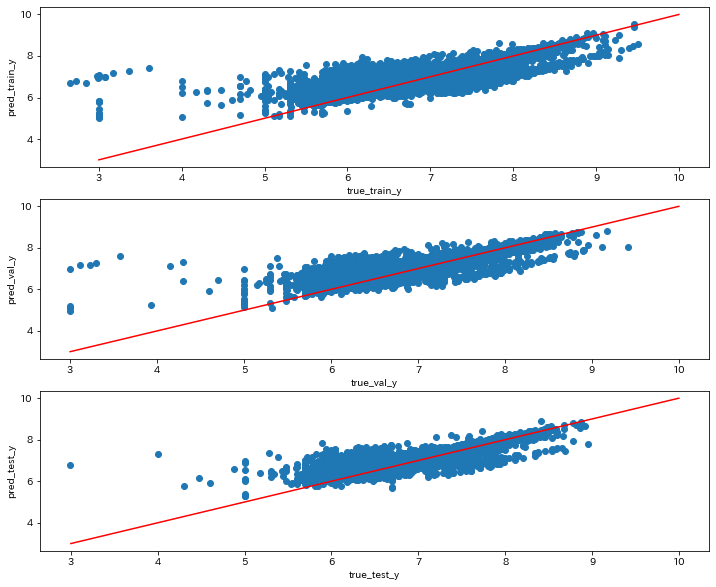

In [14]:
#残差プロット
_x=np.linspace(3,10,100)
_y=_x

fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(3,1,1)
ax1.scatter(train_y, pred_train_lgbreg1)
ax1.plot(_x,_y, c='r')
ax1.set_xlabel('true_train_y')
ax1.set_ylabel('pred_train_y')

ax2=fig.add_subplot(3,1,2)
ax2.scatter(val_y, pred_val_lgbreg1)
ax2.plot(_x,_y, c='r')
ax2.set_xlabel('true_val_y')
ax2.set_ylabel('pred_val_y')

ax3=fig.add_subplot(3,1,3)
ax3.scatter(test_y, pred_test_lgbreg1)
ax3.plot(_x,_y, c='r')
ax3.set_xlabel('true_test_y')
ax3.set_ylabel('pred_test_y')

# fig.tight_layout()
fig.show()


In [17]:
# #手元にあるデータ全体の予測結果
# tmp_pred=lgb_reg1.predict(X)
# predicts=tmp_pred+X['面積（㎡）']
# predicts

In [ ]:
#残差プロット
_x=np.linspace(1,10,100)
_y=_x

plt.scatter(y1, predicts)
plt.plot(_x, _y, c='r')
plt.xlabel('真値')
plt.ylabel('予測値')
plt.show()

In [64]:
# noiseXY=
noiseXY=noiseXY.rename(columns={'取引価格（総額）_log':'真値'})
noiseXY['予測値']=predicts
noiseXY['残差']=np.abs(noiseXY['予測値']-noiseXY['真値'])
noiseXY[noiseXY['残差']==noiseXY['残差'].max()]

Int64Index([263029], dtype='int64')

In [78]:
detection_data=train_area_log
detection_data=detection_data.rename(columns={'取引価格（総額）_log':'真値'})
detection_data['予測値']=predicts
detection_data['残差']=np.abs(detection_data['予測値']-detection_data['真値'])
noiseXY=detection_data[detection_data['予測値']>4]
noiseXY=noiseXY[noiseXY['真値']<4]
noiseXY

,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,真値,価格/面積_log,予測値,残差
12961,40108,福岡県,中央,八幡(福岡),23,３ＬＤＫ,4.174387,41.0,ＳＲＣ,住宅,NaN,商業地域,80.0,400.0,2014.25,未改装,2.845098,-1.329289,6.676532,3.831434
66364,23205,愛知県,相賀町,乙川,13,３ＬＤＫ,4.174387,1994.0,ＲＣ,住宅,NaN,市街化調整区域,60.0,200.0,2008.50,改装済,2.991226,-1.183161,6.926540,3.935314
86888,22203,静岡県,大手町,沼津,5,NaN,2.302585,1995.0,ＳＲＣ,住宅,NaN,商業地域,80.0,500.0,2014.99,NaN,3.000000,0.697415,5.823931,2.823931
88265,22203,静岡県,大手町,沼津,6,NaN,2.302585,37.0,ＲＣ,住宅,その他,商業地域,80.0,500.0,2020.50,未改装,3.000000,0.697415,5.769549,2.769549
88988,22210,静岡県,中之郷,富士川,4,３ＬＤＫ,4.442651,30.0,ＳＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2011.50,未改装,3.000000,-1.442651,7.034206,4.034206
89781,22203,静岡県,大手町,沼津,5,NaN,2.302585,1995.0,ＳＲＣ,住宅,その他,商業地域,80.0,500.0,2014.50,未改装,3.000000,0.697415,5.835871,2.835871
91288,22203,静岡県,大手町,沼津,6,NaN,2.302585,37.0,ＲＣ,住宅,その他,商業地域,80.0,500.0,2020.50,NaN,3.000000,0.697415,5.795520,2.795520
96069,20217,長野県,東立科,中込,105,２ＤＫ,3.401197,48.0,ＳＲＣ,住宅,NaN,都市計画区域外,NaN,NaN,2013.99,未改装,3.000000,-0.401197,4.931735,1.931735
96079,20217,長野県,東立科,中込,105,１Ｋ,2.995732,48.0,ＳＲＣ,住宅,NaN,都市計画区域外,NaN,NaN,2010.50,未改装,3.934498,0.938766,5.289186,1.354687
96242,20217,長野県,東立科,佐久平,120,２ＤＫ,3.401197,48.0,ＳＲＣ,住宅,NaN,都市計画区域外,NaN,NaN,2012.50,未改装,3.000000,-0.401197,5.028012,2.028012


In [ ]:
#都道府県別の残差
detection_data['残差'].mean()

In [85]:
test[test['都道府県']=='東立科']

,ID,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装


In [16]:
test=test.drop('ID', axis=1)
test

,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,1101,北海道,大通西,西１１丁目,1,３ＬＤＫ,4.317488,6.0,ＲＣ,住宅,住宅,商業地域,80.0,600.0,2021.50,未改装
1,1101,北海道,大通西,西１８丁目,0,１ＤＫ,3.401197,45.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
2,1101,北海道,大通西,西１８丁目,3,３ＬＤＫ,4.248495,38.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,改装済
3,1101,北海道,大通西,西１８丁目,2,２ＬＤＫ,3.912023,33.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,未改装
4,1101,北海道,大通西,西１８丁目,2,１ＤＫ,3.806662,31.0,ＳＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.99,改装済
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21000,47208,沖縄県,屋富祖,古島,45,２ＬＤＫ,4.382027,27.0,ＲＣ,NaN,住宅,第１種中高層住居専用地域,60.0,200.0,2021.50,NaN
21001,47211,沖縄県,高原,NaN,10,３ＬＤＫ,4.007333,28.0,ＲＣ,NaN,住宅,第１種中高層住居専用地域,60.0,200.0,2021.50,未改装
21002,47211,沖縄県,与儀,NaN,10,３ＬＤＫ,4.174387,5.0,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,70.0,200.0,2021.50,未改装
21003,47201,沖縄県,おもろまち,おもろまち,12,２ＬＤＫ,4.382027,15.0,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2021.50,未改装


In [22]:
# loaded_model=pickle.load(open(filename, 'rb'))
# #予測
# tmp_pred_lgbreg1=loaded_model.predict(test)

# #予測結果+面積
# pred_lgbreg1=tmp_pred_lgbreg1+test['面積（㎡）']
# pred_lgbreg1

#予測
tmp_pred_lgbreg1=lgb_reg1.predict(test)

#予測結果+面積
pred_lgbreg1=tmp_pred_lgbreg1+test['面積（㎡）']
pred_lgbreg1

0        7.775039
1        6.782154
2        7.342918
3        7.082152
4        7.082504
           ...   
21000    7.323034
21001    7.131865
21002    7.483474
21003    7.720599
21004    7.773786
Name: 面積（㎡）, Length: 21005, dtype: float64

In [23]:
#提出用サンプルファイル読み込み
sample=pd.read_csv('./data/sample_submission.csv')

#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=pred_lgbreg1
sample.to_csv('submission_lgbreg5.csv', index=None)

In [43]:
submission1516_123=pd.read_csv('./submissoin1516_123.csv')
submission_lgbreg4=pd.read_csv('./submission_lgbreg4.csv')
pred1516_123_lr4=(submission1516_123['取引価格（総額）_log']+submission_lgbreg4['取引価格（総額）_log'])/2.0

#提出用サンプルファイル読み込み
sample=pd.read_csv('./data/sample_submission.csv')

#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=(pred1516_123_lr4+result)/2.0
sample.to_csv('submission1516_123_lr4_12345.csv', index=None)

In [6]:
pred1516_123_lr4

0        7.749454
1        6.828586
2        7.326606
3        7.062576
4        7.109652
           ...   
21000    7.332650
21001    7.127377
21002    7.460895
21003    7.695625
21004    7.789572
Name: 取引価格（総額）_log, Length: 21005, dtype: float64

In [41]:
file_path='./submission_lgbreg*.csv'
files=[]

for path in glob.glob(file_path):
    files.append(path)

files.pop(0)

s=0
preds=[]
for i in range(len(files)):
    p=pd.read_csv(files[i])
    p=p['取引価格（総額）_log']
    preds.append(p)
    s+=preds[i]
    
# preds[0]
result=s/len(files)
result

0        7.752683
1        6.824462
2        7.331807
3        7.085927
4        7.113268
           ...   
21000    7.337069
21001    7.145558
21002    7.460092
21003    7.702558
21004    7.790535
Name: 取引価格（総額）_log, Length: 21005, dtype: float64

In [42]:
#提出用サンプルファイル読み込み
sample=pd.read_csv('./data/sample_submission.csv')

#提出用ファイルに予測結果格納(LightGBM)
sample['取引価格（総額）_log']=result
sample.to_csv('submission_lgb_reg12345.csv', index=None)